In [3]:
import pandas as pd
import pickle
import os
import sys
sys.path.append('..\\src')
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [14]:
# Unpickle combined df with repeats removed 
with open('../data/yelp_fsq_combined_norepeatvenues.pickle', 'rb') as df:
    df = pickle.load(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52967 entries, 0 to 52967
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reference_bike_stn      52967 non-null  object 
 1   fsq_id                  25653 non-null  object 
 2   fsq_cat_id              25653 non-null  float64
 3   fsq_cat_name            25653 non-null  object 
 4   lat                     52967 non-null  float64
 5   long                    52967 non-null  float64
 6   name                    52967 non-null  object 
 7   street_address          51696 non-null  object 
 8   zip                     52947 non-null  object 
 9   city                    52967 non-null  object 
 10  distance_from_bike_stn  52967 non-null  int64  
 11  yelp_id                 27314 non-null  object 
 12  yelp_cat_alias          27314 non-null  object 
 13  price                   23519 non-null  object 
 14  rating                  27314 non-null

In [6]:
df.head(5)

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn,yelp_id,yelp_cat_alias,price,rating,review_count
0,d0e8f4f1834b7b33a3faf8882f567ab8,4b3fc82cf964a520a1ae25e3,13303.0,Mexican Restaurant,37.850052,-122.270523,Las Palmas Super Burritos and Heros,3221 Adeline St,94703,Berkeley,33,NaN,NaN,NaN,NaN,NaN
1,d0e8f4f1834b7b33a3faf8882f567ab8,57da76a603a44d3f9b3ddd3b,10004.0,Art Gallery,37.849798,-122.271728,Firehouse Collective East/West Art Studios,1835 Harmon St,94703,Berkeley,100,NaN,NaN,NaN,NaN,NaN
2,d0e8f4f1834b7b33a3faf8882f567ab8,4b64bd80f964a52074cc2ae3,13064.0,Pizzeria,37.849316,-122.271629,Domino's Pizza,3264 Adeline St,94703,Berkeley,113,NaN,NaN,NaN,NaN,NaN
3,d0e8f4f1834b7b33a3faf8882f567ab8,4c12e9a51b5cef3b9cd7edc4,13102.0,Cantonese Restaurant,37.848703,-122.270660,Chen's Garden,1818 Alcatraz Ave,94703,Berkeley,119,NaN,NaN,NaN,NaN,NaN
4,d0e8f4f1834b7b33a3faf8882f567ab8,52fe4532498e80c8d231d768,13034.0,Café,37.850958,-122.271077,Rasa Caffe,3140 Martin Luther King Jr Way,94703,Berkeley,141,NaN,NaN,NaN,NaN,NaN


In [7]:
# UNPICKLE CITYBIKES DF
with open('../data/citybikes_filled_df.pickle', 'rb') as df:
    citybikes_df = pickle.load(df)

citybikes_df.head(5)

,name,id,timestamp,longitude,latitude,slots,free_bikes,empty_slots,has_ebikes,ebikes,payment,renting,returning
0,Harmon St at Adeline St,d0e8f4f1834b7b33a3faf8882f567ab8,2024-04-02T18:29:27.066000Z,-122.270582,37.849735,15,9,6,True,0,"[key, creditcard]",1,1
1,Fountain Alley at S 2nd St,983514094dd808b1604da2dcfc2d09af,2024-04-02T18:29:26.582000Z,-121.889277,37.336188,11,8,3,True,6,"[key, creditcard]",1,1
2,Oak St at 1st St,da17603652106fda93da4e255a5b0a22,2024-04-02T18:29:27.044000Z,-121.88109,37.322125,23,14,9,True,7,"[key, creditcard]",1,1
3,Bestor Art Park,7a21c92b3b4cd2f7759107b4fdebf869,2024-04-02T18:29:26.797000Z,-121.874119,37.323678,15,12,3,True,3,"[key, creditcard]",1,1
4,5th St at Virginia St,ce34d38fb230a23c1ced12d1e16df294,2024-04-02T18:29:26.971000Z,-121.87712,37.325998,27,19,7,True,12,"[key, creditcard]",1,1


In [22]:
df2 = pd.DataFrame()
df2['id'] = citybikes_df['id']
df2['slots'] = citybikes_df['slots']

row_counts_per_bike_stn = df['reference_bike_stn'].value_counts().reset_index()

# Rename the columns
row_counts_per_bike_stn.columns = ['id', 'num_venues']

print(row_counts_per_bike_stn)

                                   id  num_venues
0    a0a5d3b009e300e926558342b46b6be7         100
1    91bba2bf0246d6623c164d42c47736e4         100
2    700a9ce7584edef750fd2f8481a9c802         100
3    b04f626c4d402aefbecd84d326e5fd55         100
4    5f212a36c28e610e4e579916b4000dfb         100
..                                ...         ...
550  cf78144e1fe0f49224de5d9886357775          67
551  b949f871161f40eb2949854a85a0472a          66
552  a39949a03aa488410e33371365084987          64
553  3962b15d560bc3563bcdd0e638d9f0f2          46
554  59f57a632668a24ab18d8bc9ff703af2          43

[555 rows x 2 columns]


In [19]:
df2

,id,slots
0,d0e8f4f1834b7b33a3faf8882f567ab8,15
1,983514094dd808b1604da2dcfc2d09af,11
2,da17603652106fda93da4e255a5b0a22,23
3,7a21c92b3b4cd2f7759107b4fdebf869,15
4,ce34d38fb230a23c1ced12d1e16df294,27
...,...,...
550,7f53cf83c7bf09ec70e4ae4b751e504f,19
551,c5a5035c0cd5a040596129de7bac29dd,19
552,6b0cd11ea6451ee4bffce5ec7036f895,25
553,083037366ce9a5bc31c501316b4f8714,21


In [28]:
df3 = pd.merge(df2, row_counts_per_bike_stn, on='id')
print(df3)

                                   id slots  num_venues
0    d0e8f4f1834b7b33a3faf8882f567ab8    15          99
1    983514094dd808b1604da2dcfc2d09af    11         100
2    da17603652106fda93da4e255a5b0a22    23          85
3    7a21c92b3b4cd2f7759107b4fdebf869    15          85
4    ce34d38fb230a23c1ced12d1e16df294    27          99
..                                ...   ...         ...
550  7f53cf83c7bf09ec70e4ae4b751e504f    19          81
551  c5a5035c0cd5a040596129de7bac29dd    19         100
552  6b0cd11ea6451ee4bffce5ec7036f895    25          90
553  083037366ce9a5bc31c501316b4f8714    21         100
554  a0a5d3b009e300e926558342b46b6be7    18         100

[555 rows x 3 columns]


In [39]:
# Add a constant term to the independent variable 'num_venues'
X = sm.add_constant(df3['num_venues'])

# Dependent variable 'slots'
Y = df3['slots']

# Create and fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

# Get the coefficients of the model
print("Coefficients:", result.params)

# Make predictions
Y_pred = result.predict(X)

                            OLS Regression Results                            
Dep. Variable:                  slots   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     37.76
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.53e-09
Time:                        17:00:55   Log-Likelihood:                -1797.2
No. Observations:                 555   AIC:                             3598.
Df Residuals:                     553   BIC:                             3607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4347      3.030      1.133      0.2

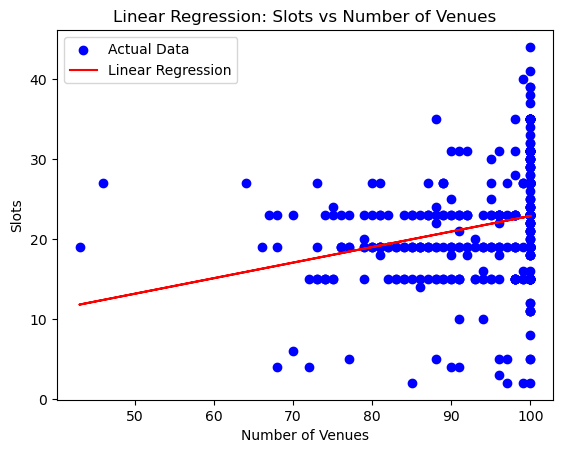

In [40]:
plt.scatter(df3['num_venues'], df3['slots'], color='blue', label='Actual Data')
plt.plot(df3['num_venues'], result.predict(), color='red', label='Linear Regression')
plt.title('Linear Regression: Slots vs Number of Venues')
plt.xlabel('Number of Venues')
plt.ylabel('Slots')
plt.legend()
plt.show()